In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('test2.csv')
df.head()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### Smart Factory
- VM - 가상 계측 : 계측에 필요한 불필요한 요소들을 줄여서 생산성을 높이자.
- APC - 자동 공정 관리 : 불량률이 감소한다. 
- PHM  - 설비 예방 보전 

### 설비 고장시 해결절차 프로세스 
1. 현장 엔지니어 인지
2. 담당 엔지니어 호출
3. 담당 엔지니어 입실
4. diagnostics( 진단 )
5. troubleshooting

#### 컬럼
- unit : 엔진 
- cycle : 한 번 썻을 때 데이터 가 이랬다, 2 번 썻을 때 데이터가 이랬다.
센서 데이터 : 무의미한 데이터를 가진 칼럼을 가질 확률이 굉장히 높다. 

# EDA
- 분석 방향성 : 언제 고장 날까를 예측해보자.

In [3]:
one_unit = df.loc[df['unit'] == 1]

<Axes: xlabel='cycle', ylabel='T2'>

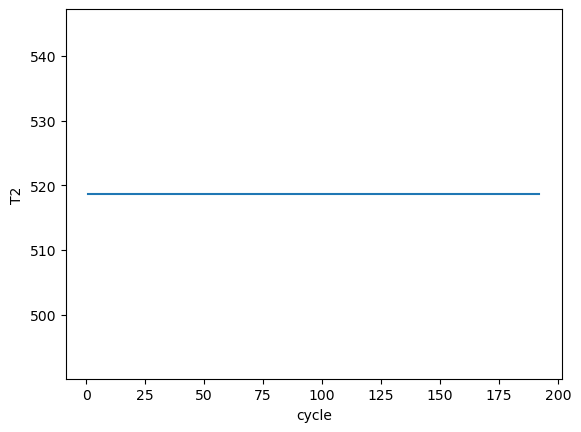

In [4]:
sns.lineplot(data = one_unit, x = 'cycle', y= 'T2') # cycle이 증가해도 T2의 변화는 없다. 

<Axes: xlabel='cycle', ylabel='P30'>

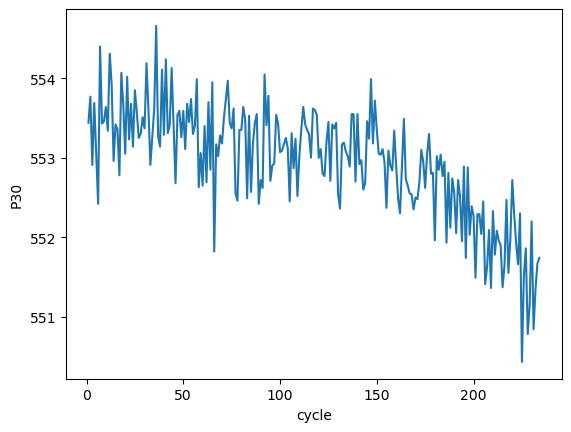

In [5]:
one_unit = df.loc[df['unit'] == 20]
sns.lineplot(data = one_unit, x = 'cycle', y= 'P30')

## unit 마다 cycle이 다 다르다. 이에 cycle이 끝나는 시점이 장비가 죽었다는 것을 알 수 있게된다. 

In [6]:
df.groupby('unit').agg({'cycle' : np.max})

,cycle
unit,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


#### 분석 방향성에 맞는 label 생성
- RUL (remaining useful life)

In [7]:
one_unit['RUL'] = np.max(one_unit['cycle']) - one_unit['cycle'] + 1
one_unit.tail()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
4163,20,230,-0.0010,-0.0000,100.0,518.67,643.57,1605.67,1431.45,14.62,...,2388.24,8144.08,8.4887,0.03,396,2388,100.0,38.60,23.1231,5
4164,20,231,0.0022,-0.0003,100.0,518.67,643.89,1603.35,1429.72,14.62,...,2388.22,8146.48,8.4800,0.03,397,2388,100.0,38.74,22.9885,4
4165,20,232,-0.0003,0.0000,100.0,518.67,643.85,1608.02,1432.08,14.62,...,2388.29,8139.51,8.5230,0.03,397,2388,100.0,38.33,23.1460,3
4166,20,233,-0.0012,-0.0001,100.0,518.67,643.93,1601.90,1437.23,14.62,...,2388.23,8143.94,8.5058,0.03,396,2388,100.0,38.46,22.9783,2
4167,20,234,0.0011,-0.0004,100.0,518.67,643.86,1598.43,1430.93,14.62,...,2388.25,8143.30,8.5433,0.03,397,2388,100.0,38.57,22.9964,1


In [8]:
rul_df = pd.DataFrame()

for i in range(100):
    one_unit = df.loc[df['unit'] == i + 1]
    one_unit['RUL'] = np.max(one_unit['cycle']) - one_unit['cycle'] + 1
    
    rul_df = pd.concat([rul_df, one_unit])
rul_df

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,5
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,4
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,3
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


<Axes: xlabel='RUL', ylabel='P30'>

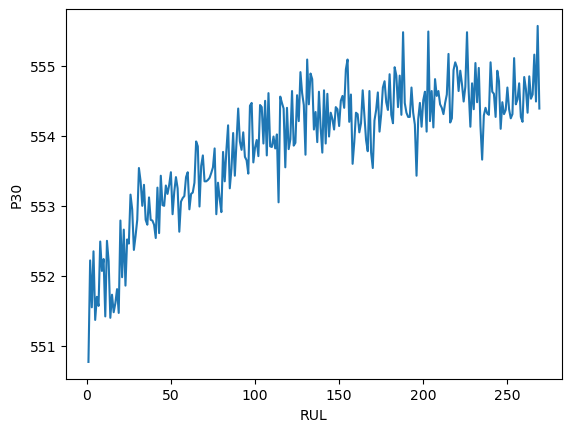

In [9]:
one_unit = rul_df.loc[rul_df['unit'] == 5]
sns.lineplot(data = one_unit, x = 'RUL', y ='P30')

<Axes: xlabel='RUL', ylabel='P30'>

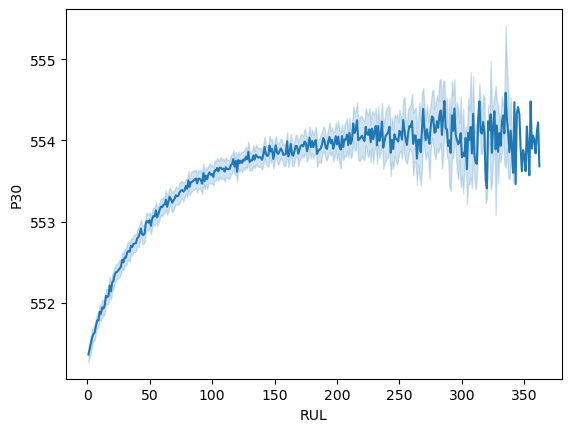

In [10]:
sns.lineplot(data = rul_df, x = 'RUL', y ='P30') # 이 설비가 고장에 가까워지고 있다. 

In [11]:
rul_df.columns

Index(['unit', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'RUL'],
      dtype='object')

In [12]:
rul_df.to_csv('test2_modify.csv', index = False)

In [13]:
# embed
features = ['op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
label = 'RUL'

In [14]:
from sklearn.ensemble import RandomForestRegressor as rf

In [15]:
train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [16]:
model = rf()
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
fi = model.feature_importances_ # 중요한 변수를 확인하기, 랜덤포레스트의 특성

In [18]:
new = pd.DataFrame()
new["features"] = features
new['importance'] = fi


new = new.sort_values(by = 'importance', ascending = False)
new

,features,importance
13,Ps30,0.431400
11,Nc,0.122495
6,T50,0.085280
14,phi,0.053761
16,NRc,0.038250
9,P30,0.033965
23,W32,0.033364
17,BPR,0.032065
5,T30,0.030632
4,T24,0.029256


In [19]:
list(new.sort_values(by = 'importance', ascending = False)['features'][:8])

['Ps30', 'Nc', 'T50', 'phi', 'NRc', 'P30', 'W32', 'BPR']

<Axes: xlabel='RUL', ylabel='BPR'>

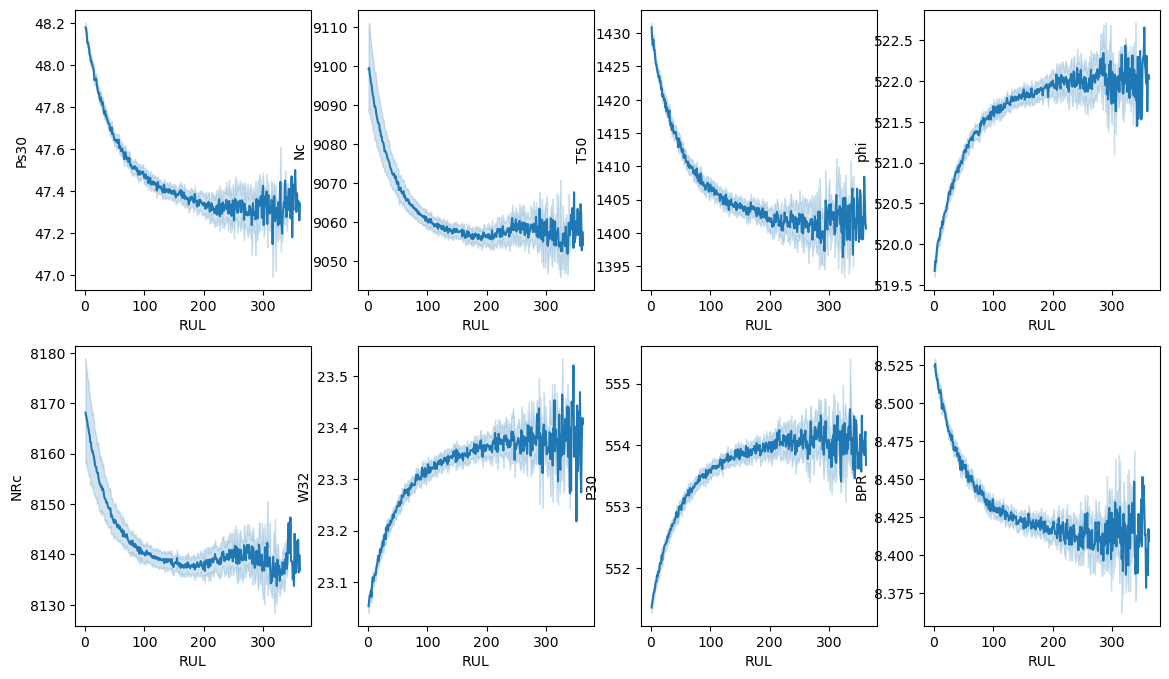

In [20]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
fig.set_size_inches(14 ,8)
sns.lineplot(data = rul_df, x = 'RUL', y ='Ps30' , ax = ax1)
sns.lineplot(data = rul_df, x = 'RUL', y ='Nc' , ax = ax2)
sns.lineplot(data = rul_df, x = 'RUL', y ='T50' , ax = ax3)
sns.lineplot(data = rul_df, x = 'RUL', y ='phi' , ax = ax4)
sns.lineplot(data = rul_df, x = 'RUL', y ='NRc' , ax = ax5)
sns.lineplot(data = rul_df, x = 'RUL', y ='W32' , ax = ax6)
sns.lineplot(data = rul_df, x = 'RUL', y ='P30' , ax = ax7)
sns.lineplot(data = rul_df, x = 'RUL', y ='BPR' , ax = ax8)

In [21]:
rul_df.describe().T.sort_values(by = 'std')

,count,mean,std,min,25%,50%,75%,max
PCNfR_dmd,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
op_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Nf_dmd,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.0000,2388.0000,2388.0000
farB,20631.0,0.030000,1.556432e-14,0.0300,0.0300,0.0300,0.0300,0.0300
epr,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000
P2,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
T2,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
op_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
P15,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
op_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087


In [22]:
interested = ['unit','Ps30', 'Nc', 'T50',
 'phi',
 'NRc',
 'W32',
 'P30',
 'BPR',
 'T30',
 'T24',
 'W31',
 'htBleed',
 'NRf',
 'Nf', 'RUL']
rul_df[interested].to_csv('test2.modify2.csv', index = False)

In [23]:
list(new.sort_values(by = 'importance', ascending = False)['features'][:14])

['Ps30',
 'Nc',
 'T50',
 'phi',
 'NRc',
 'P30',
 'W32',
 'BPR',
 'T30',
 'T24',
 'W31',
 'op_1',
 'NRf',
 'Nf']